# Overfitting demo

## Criando um conjunto de dados baseado em uma função senoidal 

In [2]:
import math
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
%matplotlib inline

Vamos considerar um conjunto de dados sintéticos de 30 pontos amostrados de uma função senoidal $y = \sin(4x)$:

In [3]:
def f(x):
    return np.sin(np.multiply(4,x))

Abaixo criamos valores aleatéorios para $x$ no intervalo [0,1)

In [4]:
random.seed(98103)
n = 30 # quantidade de valores gerados
x = np.array([random.random() for _ in range(n)])  #em cada iteração gera um valor aleatório entre 0 e 1
x=np.sort(x) # ordena os valores em ordem crescente
#transforma o array em uma matrix com uma n linhas e 1 coluna (vetor coluna)
X = x[:,np.newaxis] 

Calcula $y$ como uma função de $x$. $y$ é chamada variável independente pois depende de $x$

In [5]:
Y = f(x)

Adiciona ruído Gaussiano aleatório à $y$

In [6]:
random.seed(1)
#ruído é amostrado de uma distribuição normal com média 0 e desvio padrão 1/3
e = np.array([random.gauss(0,1.0/3.0) for i in range(n)]) 
Y = Y + e

### Funções auxiliares

Função para plotar os dados (scatter plot)

In [7]:
def plot_data(X,Y):    
    plt.plot(X,Y,'k.')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis([0,1,-1.5,2])

Função para imprimir coeficientes

In [8]:
def print_coefficients(model):    
    # Retorna o grau do polinômio
    deg = len(model.steps[1][1].coef_)-1
    # Obtém os parâmetros estimados
    w = list(model.steps[1][1].coef_) #model.steps é usado pois o modelo é calculado usando make_pipile do scikit learn
    # Numpy tem uma função para imprimir o polinômio mas os parâmetros precisam estar na ordem inversa
    print ('Polinômio estimado para grau ' + str(deg) + ':')
    w.reverse()
    print (np.poly1d(w)+model.steps[1][1].intercept_)

Função para calcular uma regressão polinomial para qualquer grau usando scikit learn.

In [9]:
def polynomial_regression(X,Y,deg):
    model = make_pipeline(PolynomialFeatures(deg),LinearRegression()) 
    model.fit(X,Y)
    return model

Função para plotar o modelo por meio de suas predições

In [10]:
def print_poly_predictions(X,Y, model):
    plot_data(X,Y)
    x_plot = np.array([i/200.0 for i in range(200)])
    X_plot = x_plot[:,np.newaxis]
    y_pred = model.predict(X_plot)
    plt.plot(x_plot,y_pred,'g-')
    plt.axis([0,1,-1.5,2])

In [36]:
def plot_residuals_vs_fit(X,Y, model):
#    plot_data(X,Y)
#    x_plot = np.array([i/200.0 for i in range(200)])
#    X_plot = x_plot[:,np.newaxis]
    y_pred = model.predict(X)
    res = Y - y_pred
    plt.plot(y_pred,res,'k.',color='blue',)
    plt.axhline(y=0., color='r', linestyle='-')
    plt.xlabel("predictions")
    plt.ylabel("residuals")

### Função verdadeira

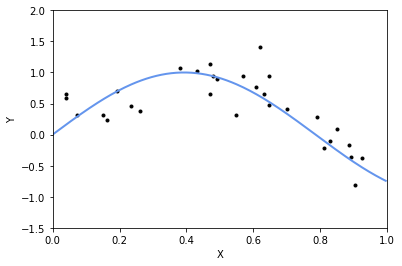

In [33]:
plot_data(X,Y)
x_plot = np.array([i/200.0 for i in range(200)])
y_plot = f(x_plot)
plt.plot(x_plot,y_plot,color='cornflowerblue',linewidth=2)

## Regressão polinomial de diferentes graus

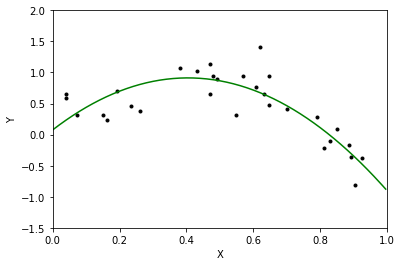

In [55]:
model = polynomial_regression(X,Y,2)
print_poly_predictions(X,Y,model)    

Mostrando o modelo e coeficientes.

In [402]:
print_coefficients(model)

Polinômio estimado para grau 16:
           16             15            14             13
3.337e+08 x  - 2.226e+09 x  + 6.62e+09 x  - 1.156e+10 x 
              12         11            10             9             8
 + 1.309e+10 x  - 1e+10 x  + 5.14e+09 x  - 1.657e+09 x + 2.258e+08 x
              7             6             5             4             3
 + 6.694e+07 x - 4.734e+07 x + 1.393e+07 x - 2.548e+06 x + 3.018e+05 x
              2
 - 2.188e+04 x + 839.4 x - 12.01


# Regressão Ridge

A regressão ridge se propõe a evitar o overfitting adicionando um custo ao RSS (dos mínimos quadrados) que depende da norma L2 dos coeficientes $\|w\|$ (ou seja da magnitude dos coeficientes).  O resultado é a penalização de ajustes com coeficientes muito grandes.  A força dessa penalidade é controlada por um parâmetro lambda (aqui chamado "L2_penalty").

Função para estimar a regressão ridge para qualquer grau de polinômio:

In [51]:
def polynomial_ridge_regression(X,Y, deg, l2_penalty):
    model = make_pipeline(PolynomialFeatures(deg),Ridge(alpha=l2_penalty)) 
    model.fit(X,Y)
    return model

## Ridge com grau 16 usando uma penalidade *muito* pequena

In [410]:
model = polynomial_ridge_regression(X,Y,deg=16,l2_penalty=1e-14)
print_coefficients(model)

Polinômio estimado para grau 16:
            16             15            14             13
-3.317e+04 x  + 1.577e+05 x  - 1.26e+05 x  - 1.746e+05 x 
              12             11            10            9
 + 1.044e+05 x  + 2.548e+05 x  - 3.75e+04 x  - 3.18e+05 x
              8             7             6             5             4
 + 3.481e+04 x + 3.699e+05 x - 3.455e+05 x + 1.365e+05 x - 2.437e+04 x
          3         2
 + 743.8 x + 372.3 x - 47.98 x + 1.959


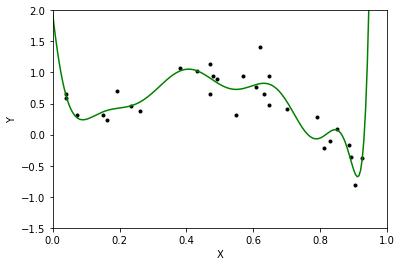

In [411]:
print_poly_predictions(X,Y,model)    

## Ridge com grau 16 usando uma penalidade *muito* grande

In [412]:
model = polynomial_ridge_regression(X,Y, deg=16, l2_penalty=100)
print_coefficients(model)

Polinômio estimado para grau 16:
           16           15            14            13           12
-0.007084 x  - 0.00789 x  - 0.008794 x  - 0.009809 x  - 0.01095 x 
            11           10           9           8           7
 - 0.01222 x  - 0.01364 x  - 0.01521 x - 0.01694 x - 0.01879 x
           6           5           4           3           2
 - 0.0207 x - 0.02253 x - 0.02397 x - 0.02439 x - 0.02253 x - 0.01594 x + 0.4948


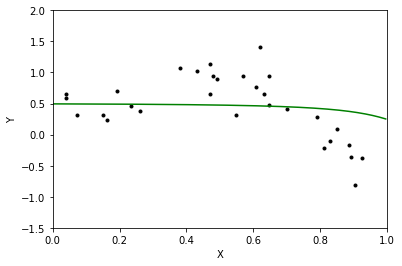

In [413]:
print_poly_predictions(X,Y,model)    

## Sequência de ajustes para uma sequência crescente de valores de lambda

lambda = 1.00e-10
Polinômio estimado para grau 16:
      16        15        14         13        12        11         10
7567 x  - 7803 x  - 6900 x  + 714.5 x  + 6541 x  + 5802 x  - 498.1 x 
         9        8        7        6        5         4         3
 - 6056 x - 4252 x + 3439 x + 4893 x - 4281 x + 769.9 x + 100.6 x
          2
 - 11.39 x - 4.716 x + 0.7859


lambda = 1.00e-08
Polinômio estimado para grau 16:
       16         15         14         13         12       11
352.8 x  - 246.4 x  - 338.4 x  - 129.4 x  + 148.9 x  + 296 x 
          10         9         8         7         6         5
 + 213.6 x  - 38.58 x - 254.8 x - 218.5 x + 62.06 x + 244.8 x
          4         3         2
 + 36.66 x - 223.2 x + 112.4 x - 17.86 x + 1.157


lambda = 1.00e-06
Polinômio estimado para grau 16:
        16         15         14         13         12         11
-11.68 x  - 1.907 x  + 7.873 x  + 14.24 x  + 14.19 x  + 6.382 x 
         10         9         8         7         6         5    

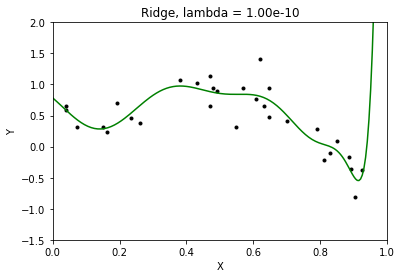

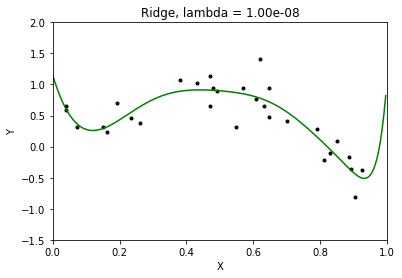

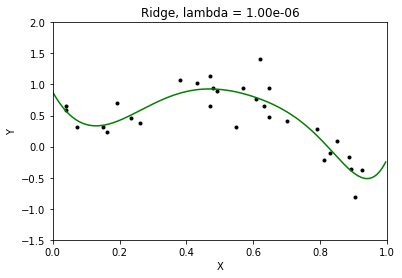

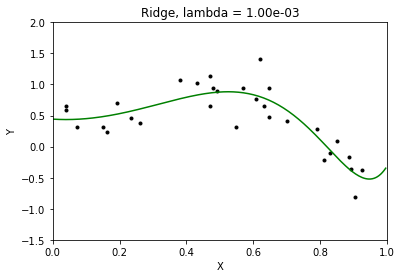

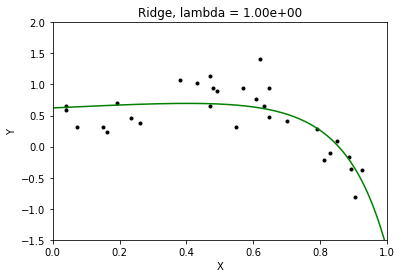

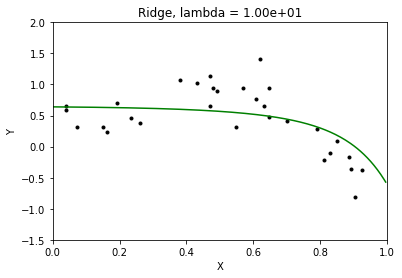

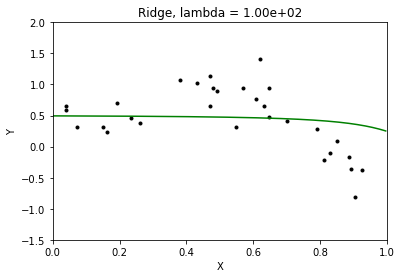

In [415]:
for l2_penalty in [1e-10, 1e-8, 1e-6, 1e-3, 1, 1e1, 1e2]:
    model = polynomial_ridge_regression(X,Y, deg=16, l2_penalty=l2_penalty)
    print('lambda = %.2e' % l2_penalty)
    print_coefficients(model)
    print('\n')
    plt.figure()
    print_poly_predictions(X,Y,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

## Usando validação cruzada para encontrar o melhor lembda para Regressão Ridge

A função abaixo calcula os rmses (root mean squared error) para um certo modelo considerando todos os k folds (parâmetro cv na função cross_val_score do scikit learn).

In [57]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,X,Y,scoring="neg_mean_squared_error",cv=10))
    return (rmse)

Cria um modelo de regressão ridge

In [58]:
model_ridge = Ridge()

Plota resultados (médias de rmse) para cada valor de alpha (ou lambda) 

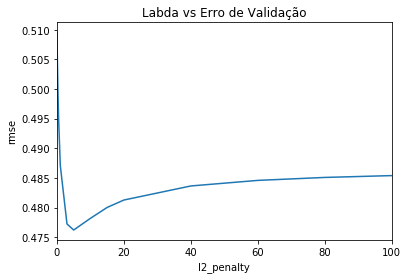

In [59]:
l2_penalties = [0.001,0.01,0.1,0.3,0.5,1,3,5,10,15,20,40,60,80,100]
cv_ridge = [rmse_cv(Ridge(alpha=l2_penalty)).mean() 
            for l2_penalty in l2_penalties]
cv_ridge = pd.Series(cv_ridge,index=l2_penalties)
cv_ridge.plot(title="Labda vs Erro de Validação")
plt.xlabel("l2_penalty")
plt.ylabel("rmse")

In [60]:
best_l2_penalty=cv_ridge.argmin()
best_rmse = cv_ridge.min()

In [61]:
print (best_l2_penalty, best_rmse) #melhor valor de (alpha,rmse) encontrado

5.0 0.47623088652


In [52]:
model = polynomial_ridge_regression(X,Y, deg=16, l2_penalty=best_l2_penalty)
print_coefficients(model)

Polinômio estimado para grau 16:
          16           15           14           13           12
-0.05261 x  - 0.05888 x  - 0.06594 x  - 0.07387 x  - 0.08275 x 
            11          10          9          8         7          6
 - 0.09265 x  - 0.1036 x  - 0.1155 x - 0.1282 x - 0.141 x - 0.1529 x
           5          4          3           2
 - 0.1613 x - 0.1618 x - 0.1456 x - 0.09851 x - 0.009176 x + 0.6715


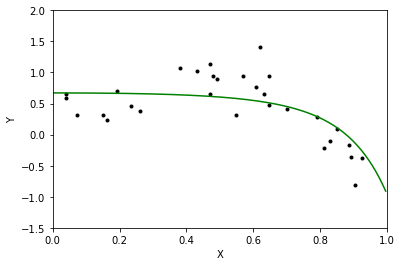

In [422]:
print_poly_predictions(X,Y,model)

# Regressão Lasso

A regressão Lasso, ao mesmo tempo, encolhe a magnitude dos coeficientes para evitar o overfitting e realiza implicitamente seleção de característcas igualando alguns atributos a zero (para lambdas, aqui chamados "L1_penalty", suficientemente grandes). Em particular, o Lasso adiciona ao RSS o custo $\|w\|$.

Função que estima a regressão polinomial de qualquer grau com a regressão Lasso.

In [163]:
def polynomial_lasso_regression(data, deg, l1_penalty):
    model = make_pipeline(PolynomialFeatures(deg),Lasso(alpha=l1_penalty,max_iter=10000)) 
    X = data['X'][:,np.newaxis] #transformando em matrix para LinearRegression
    model.fit(X,data['Y'])
    return model

## Explore a solução lasso solution como uma função de diferentes fatores de penalidade

Nos referimos ao fator de penalidade do lasso como "l1_penalty"

l1_penalty = 1.000000e-04
número de não zeros = 5
Polinômio aprendido para grau 16:
        16         8        7         3
-8.782 x  + 3.128 x + 5.38 x - 8.275 x + 3.374 x + 0.2103


l1_penalty = 1.000000e-03
número de não zeros = 2
Polinômio aprendido para grau 16:
       3
-3.46 x + 1.745 x + 0.4268


l1_penalty = 1.000000e-02
número de não zeros = 2
Polinômio aprendido para grau 16:
        5          4
-1.908 x - 0.1002 x + 0.7769


l1_penalty = 1.000000e-01
número de não zeros = 1
Polinômio aprendido para grau 16:
         3
-0.2306 x + 0.5119


l1_penalty = 1.000000e+01
número de não zeros = 0
Polinômio aprendido para grau 16:
 
0.4527




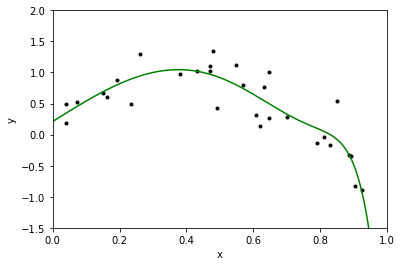

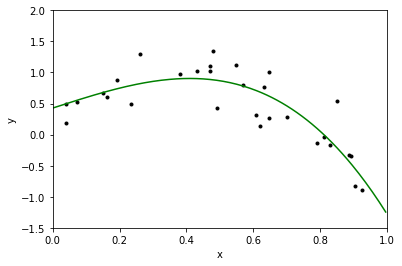

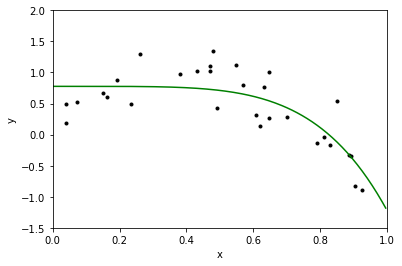

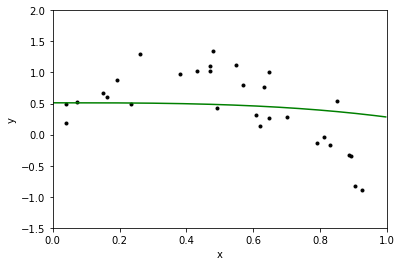

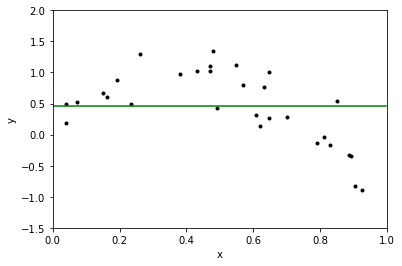

In [164]:
for l1_penalty in [0.0001, 0.001, 0.01, 0.1, 10]:
    model = polynomial_lasso_regression(data, deg=16, l1_penalty=l1_penalty)
    print ('l1_penalty = %e' % l1_penalty)
    w = list(model.steps[1][1].coef_)
    print ('número de não zeros = %d' % np.count_nonzero(w))
    print_coefficients(model)
    print ('\n')
    plt.figure()
    print_poly_predictions(data,model)
    #plt.title('LASSO, lambda = %.2e, # nonzeros = %d' % l1_penalty, np.count_nonzero(w))

Esse notebook foi inspirado nas aulas da especialização em Machine Learning da Universidade de Washington disponível no Coursera.